In [1]:
import os
import sys
from pathlib import Path
rootFolder = str(Path(os.path.abspath('')).parent)
sys.path.append(rootFolder)

In [2]:
from sim.extracellular_stim_tools.extracellular_efield import get_efield_sTMS, get_efield_rTMS, get_efield_tACS, get_efield_tDCS
import matplotlib
%matplotlib inline

# TODO: MORE TESTING
#matplotlib.use('Agg')

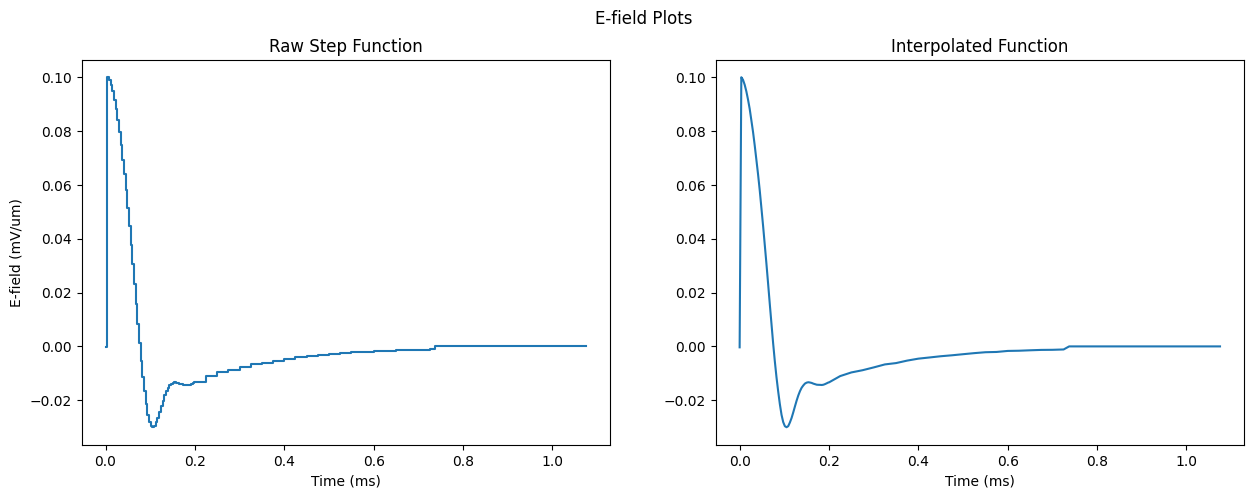

: 

In [ ]:
"""
Tests:
Pulse burst gets cut off by duration: X for high resolution time
num_tms_pulses_per_burst: None, 0, 1, 2, 3, 4, 5, 10, 100, -1
pulse_interval_within_burst_ms: None, 0, 1, -1, 10, 100
pulse_onset_interval_within_burst_ms: None, 0, 1, -1, 10, 100
pulse_freq_within_burst_Hz: None, 0, 1, -1, 10, 100
"""

# Monophasic
tms_pulse_shape='Monophasic'                     #
tms_pulse_width_ms=0.075                        #

pre_tms_period = 0 # For cell to reach baseline/get data on baseline activity
spike_detection_time = 1
tms_spiking_period = tms_pulse_width_ms+spike_detection_time # For spike detection
post_tms_period = 0 # For more baseline recording if necessary

duration = pre_tms_period + tms_spiking_period + post_tms_period # ms

wav, time, func = get_efield_sTMS(
    # Waveform params
    stim_type='sTMS',
    stim_start_ms=pre_tms_period,
    num_pulses_per_burst=1,
    tms_pulse_width_ms=tms_pulse_width_ms,  #
    tms_pulse_shape=tms_pulse_shape,
    # Simulation params
    simulation_duration_ms=duration,
    default_dt = 0.025,
    num_time_steps_in_pulse_width = 20, # 0.075/20 = 0.0375 ms
    # simulation_duration_ms = 300.,
    efield_amplitude_V_per_m = 100.,
    # stim_start_ms = 100.,
    # default_dt = 1,
    # tms_pulse_shape = "Monophasic",
    # tms_pulse_width_ms = 100.,
    # num_pulses_per_burst = 1,
    # pulse_interval_within_burst_ms = 0,
    # pulse_onset_interval_within_burst_ms = None,
    # pulse_freq_within_burst_Hz = None,
    # pulse_dt = 0.1,
    plot = True,
)
# print(wav)
# print(time)

[0, 9.999, 10.0, 11.0, 11.999, 12.0, 13.0, 13.999, 14.0, 15.0, 30]
[0, 0, 0.09999999999999999, 0, 0, 0.09999999999999999, 0, 0, 0.09999999999999999, 0, 0]


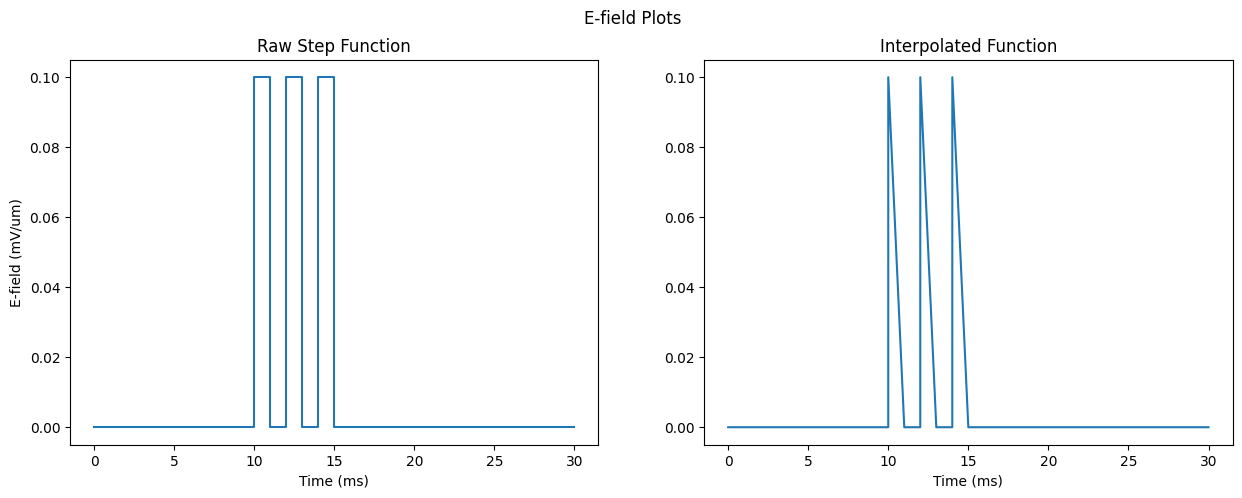

In [4]:
"""
Tests:
Pulse burst gets cut off by duration
simulation duration: 0, -1, 300, 10000, interactions with stim_start_ms, stim_end_ms
efield_amplitude_V_per_m: 100, 1000, 10000, 0, -1, -100
burst_freq_Hz: -1, 0, 1, 100
stim_start_ms: 0, -1, 100, interactions with duration, stim_end_ms
stim_end_ms: 0, -1, 1, 100, interactions with duration, stim_start_ms
total_num_tms_pulse_bursts: -1, 0, 1, 10, 100, 10000
default_dt: 0, -1, 0.001, 1, 100, 1000, 10000
tms_pulse_shape: Ideal_Sine, Ideal_Square
tms_pulse_width_ms: 25, 0, 1, -1, 100
num_tms_pulses_per_burst: None, 0, 1, 2, 3, 4, 5, 10, 100, -1
pulse_interval_within_burst_ms: None, 0, 1, -1, 10, 100
pulse_onset_interval_within_burst_ms: None, 0, 1, -1, 10, 100
pulse_freq_within_burst_Hz: None, 0, 1, -1, 10, 100
pulse_dt: None, 0, -1, 0.001, 1, 100, 1000, 10000, interactions with default_dt
"""

wav, time, func = get_efield_rTMS(
    simulation_duration_ms = 30,
    efield_amplitude_V_per_m = 100.,
    burst_freq_Hz = 10,
    stim_start_ms = 10.,
    stim_end_ms = None,
    total_num_tms_pulse_bursts = None,
    default_dt = 10,
    tms_pulse_shape = "Ideal_Sine",
    tms_pulse_width_ms = 1,
    num_pulses_per_burst = 3,
    pulse_interval_within_burst_ms = None,
    pulse_onset_interval_within_burst_ms = None,
    pulse_freq_within_burst_Hz = 500,
    pulse_dt = 10,
    plot = True
)

print(time)
print(wav)


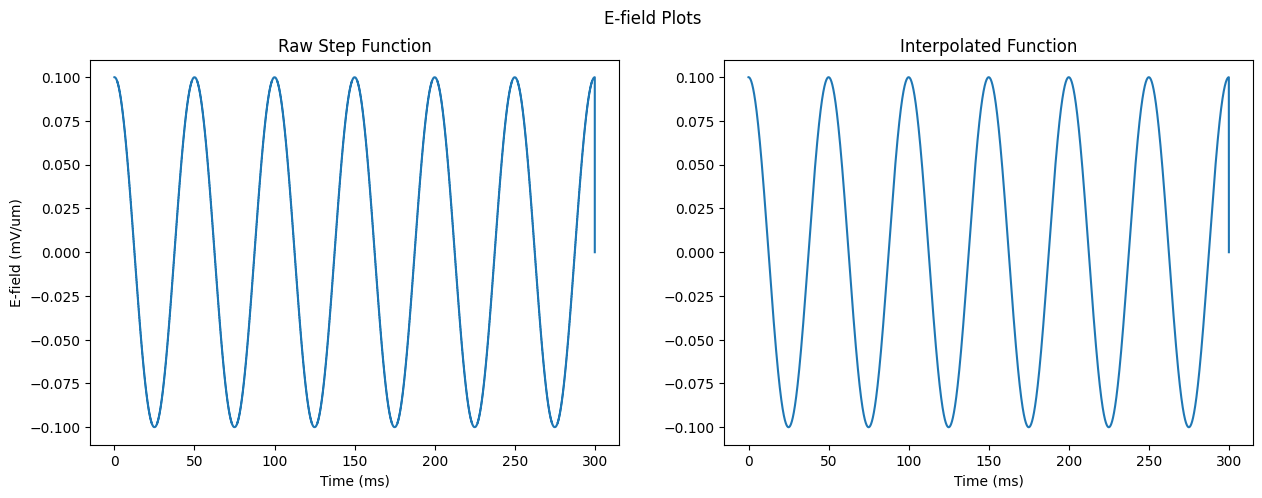

In [5]:
"""
Tests:
Pulse set gets cut off by duration
simulation duration: 0, -1, 300, 10000, interactions with stim_start_ms, stim_end_ms
efield_amplitude_V_per_m: 100, 1000, 10000, 0, -1, -100
stim_start_ms: 0, -1, 100, interactions with duration, stim_end_ms
stim_end_ms: 0, -1, 1, 100, interactions with duration, stim_start_ms
sampling_period_ms: 0, -1, 0.001, 1, 100, 1000, 10000
tacs_freq_Hz: -1, 0, 1, 100
"""
wav, time, func = get_efield_tACS(
    simulation_duration_ms = 300.,
    efield_amplitude_V_per_m = 100.,
    stim_start_ms = 0.,
    stim_end_ms = None,
    sampling_period_ms = 0.001,
    tacs_freq_Hz = 20.,
    plot = True
)

In [6]:
"""
Tests:
Pulse burst gets cut off by duration
simulation duration: 0, -1, 300, 10000, interactions with stim_start_ms, stim_end_ms
efield_amplitude_V_per_m: 100, 1000, 10000, 0, -1, -100
stim_start_ms: 0, -1, 100, interactions with duration, stim_end_ms
stim_end_ms: 0, -1, 1, 100, interactions with duration, stim_start_ms
sampling_period_ms: 0, -1, 0.001, 1, 100, 1000, 10000
"""
wav, time, func = get_efield_tDCS(
    simulation_duration_ms = 300.,
    efield_amplitude_V_per_m = 100.,
    stim_start_ms = 0.,
    stim_end_ms = None,
    sampling_period_ms = 0.001,
    plot = True
)

ValueError: pulse_width_ms [-300.0] must be > 0